# 8. 머신러닝 프로세스

모델 평가

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data = pd.read_csv('./../../data/bigboongi/Fvote.csv', encoding='utf-8')

In [3]:
X = data[data.columns[1:13]]
y = data[['vote']]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

Final_model = LogisticRegression(C=10)
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [6]:
pred_train = Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.740506329113924

In [7]:
pred_test = Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6792452830188679

In [8]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print('훈련데이터 오차행렬: \n', confusion_train)

훈련데이터 오차행렬: 
 [[ 12  34]
 [  7 105]]


In [9]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print('분류예측 레포트: \n', cfreport_train)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [10]:
confusion_test = confusion_matrix(y_test, pred_test)
print('테스트데이터 오차행렬: \n', confusion_test)

테스트데이터 오차행렬: 
 [[ 3 12]
 [ 5 33]]


In [11]:
from sklearn.metrics import classification_report
cfreport_test = classification_report(y_test, pred_test)
print('분류예측 레포트: \n', cfreport_test)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [12]:
# ROC 계산
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6350877192982456

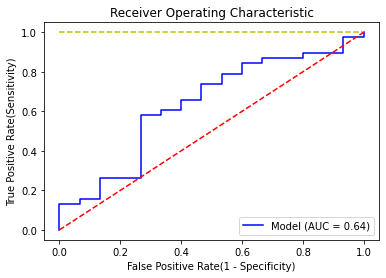

In [13]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [1, 1], 'y--')
plt.plot([0, 1], [0, 1], 'r--')

plt.legend(loc='lower right')
plt.show()